# 0. Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1. Loading the Dataset

In [101]:
file_path = "ds_salaries.csv"
ds_salaries_data = pd.read_csv(file_path)

# 2. Understanding and Preparing data

In [102]:
ds_salaries_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 2.0 Checking the datatypes of the features

In [103]:
ds_salaries_data.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## 2.1. Checking for missing data

In [104]:
ds_salaries_data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 2.2. Checking for the dimension of the dataset

In [105]:
ds_salaries_data.shape

(607, 12)

## 2.3. General Statistical summary using .describe()

In [106]:
ds_salaries_data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


- It can be noticed that the "Unnamed" feature is actually just an Id, so it will be deleted.
- There is a significant difference between the mean and median values regarding the salary in USD, but this is not an indicator of wrong data in our case because it's not weird that people may have really high salaries but they are not that many.
- Half of the data has a salry in USD that is less than the average salary in USD.

## 2.4. Class-wise statistical analysis

In [107]:
small_company_size = ds_salaries_data[ds_salaries_data['company_size'] == 'S']
small_company_size.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,83.000000,83.000000,8.300000e+01,83.000000,83.000000
mean,180.783133,2020.855422,3.777100e+05,77632.674699,69.879518
std,146.687410,0.665024,1.282486e+06,63461.706497,39.770499
min,1.000000,2020.000000,9.272000e+03,2859.000000,0.000000
25%,67.000000,2020.000000,5.099950e+04,41943.000000,50.000000
50%,149.000000,2021.000000,8.000000e+04,65000.000000,100.000000
75%,228.500000,2021.000000,1.315000e+05,100000.000000,100.000000
max,522.000000,2022.000000,8.500000e+06,416000.000000,100.000000


In [108]:
medium_company_size = ds_salaries_data[ds_salaries_data['company_size'] == 'M']
medium_company_size.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,326.00000,326.000000,3.260000e+02,326.000000,326.000000
mean,384.45092,2021.751534,1.465225e+05,116905.466258,72.546012
std,151.16091,0.522933,2.228349e+05,59287.694614,42.851687
min,2.00000,2020.000000,4.000000e+03,4000.000000,0.000000
25%,303.25000,2022.000000,8.000000e+04,78131.500000,50.000000
50%,392.50000,2022.000000,1.160750e+05,113188.000000,100.000000
75%,515.50000,2022.000000,1.597500e+05,152875.000000,100.000000
max,605.00000,2022.000000,2.500000e+06,450000.000000,100.000000


In [109]:
large_company_size = ds_salaries_data[ds_salaries_data['company_size'] == 'L']
large_company_size.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,198.000000,198.000000,1.980000e+02,198.000000,198.000000
mean,220.126263,2021.065657,5.936958e+05,119242.994949,68.686869
std,154.203074,0.629827,2.538451e+06,86156.740692,37.420548
min,0.000000,2020.000000,8.000000e+03,5882.000000,0.000000
25%,95.500000,2021.000000,7.050000e+04,61041.750000,50.000000
50%,194.500000,2021.000000,1.202500e+05,100000.000000,100.000000
75%,284.750000,2021.000000,1.970000e+05,154600.000000,100.000000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.000000


The follwoing observations can be made:
- The data is clearly imbalanced as there is 83 (about 13.67%) small-sized companies, 326 (about 53.70%) medium-sized companies, 198 (32.61%) large-sized companies out of 607.
- The difference in the average salary is significant so this feature is important to indicate the company size
- The average remote ratio is nearly the same between the three categories.

# 3. Data preparation

## 3.0 Deleting unnecessary data

In [110]:
ds_salaries_data.drop(columns=["Unnamed: 0"], inplace=True)

## 3.1. Features encoding

In [111]:
ds_salaries_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [112]:
ds_salaries_data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [113]:
ds_salaries_data['experience_level'] = ds_salaries_data['experience_level'].map({"EN": 0, "MI":1, "SE":2, "EX":3})

In [114]:
ds_salaries_data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [115]:
# ds_salaries_data['employment_type'] = ds_salaries_data['employment_type'].map({"FL": 0, "CT":1, "PT":2, "FT":3})

In [116]:
# The following code is done based on the data description provided in kaggle link
ds_salaries_data['remote_ratio'] = ds_salaries_data['remote_ratio'].apply(lambda x: 0 if x < 20 else (50 if x >= 20 and x <= 80 else 100))

In [117]:
# ds_salaries_data['company_size'] = ds_salaries_data['company_size'].map({"S": 0, "M":1, "L":2})

In [118]:
ds_salaries_data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [119]:
ds_salaries_data['job_title'] = ds_salaries_data['job_title'].replace(['Machine Learning Engineer'], 'ML Engineer', regex=True)


# 4. Exploring data with visualization

## 4.0. Visualizing the distribution (Uni-variate)

#### experience_level

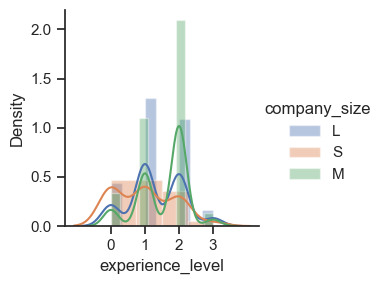

In [120]:
# Create a FacetGrid with hue mapped to "company_size"
g = sns.FacetGrid(ds_salaries_data, hue="company_size")

# Map a distribution plot to the FacetGrid using "experience_level"
g.map(sns.distplot, "experience_level")

# Add legend
g.add_legend()

# Get the underlying axes
axes = g.axes.flatten()

# Set x-axis ticks for each subplot
for ax in axes:
    ax.set_xticks([0, 1, 2, 3])  # Example ticks

# Show the plot
plt.show()


**It is interesting that the majority of those who have a mid-level experience (1) work in large-sized companies and the majority who have a senior-level experience (2) work in a medium-sized company!**

#### salary_in_usd

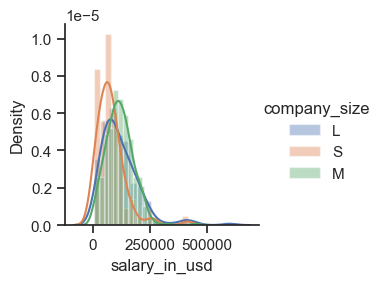

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with hue mapped to "company_size"
g = sns.FacetGrid(ds_salaries_data, hue="company_size")

# Map a distribution plot to the FacetGrid using "salary_in_usd"
g.map(sns.distplot, "salary_in_usd")

# Add legend
g.add_legend()

# Show the plot
plt.show()


**Contrary to expectations, there is a significant overlap.** 

**However, it is also noticeable that the majority of salaries in small-sized companies range between 0 and 125,000.**

## 4.1. Visualising the pair plot (Bi-variate)

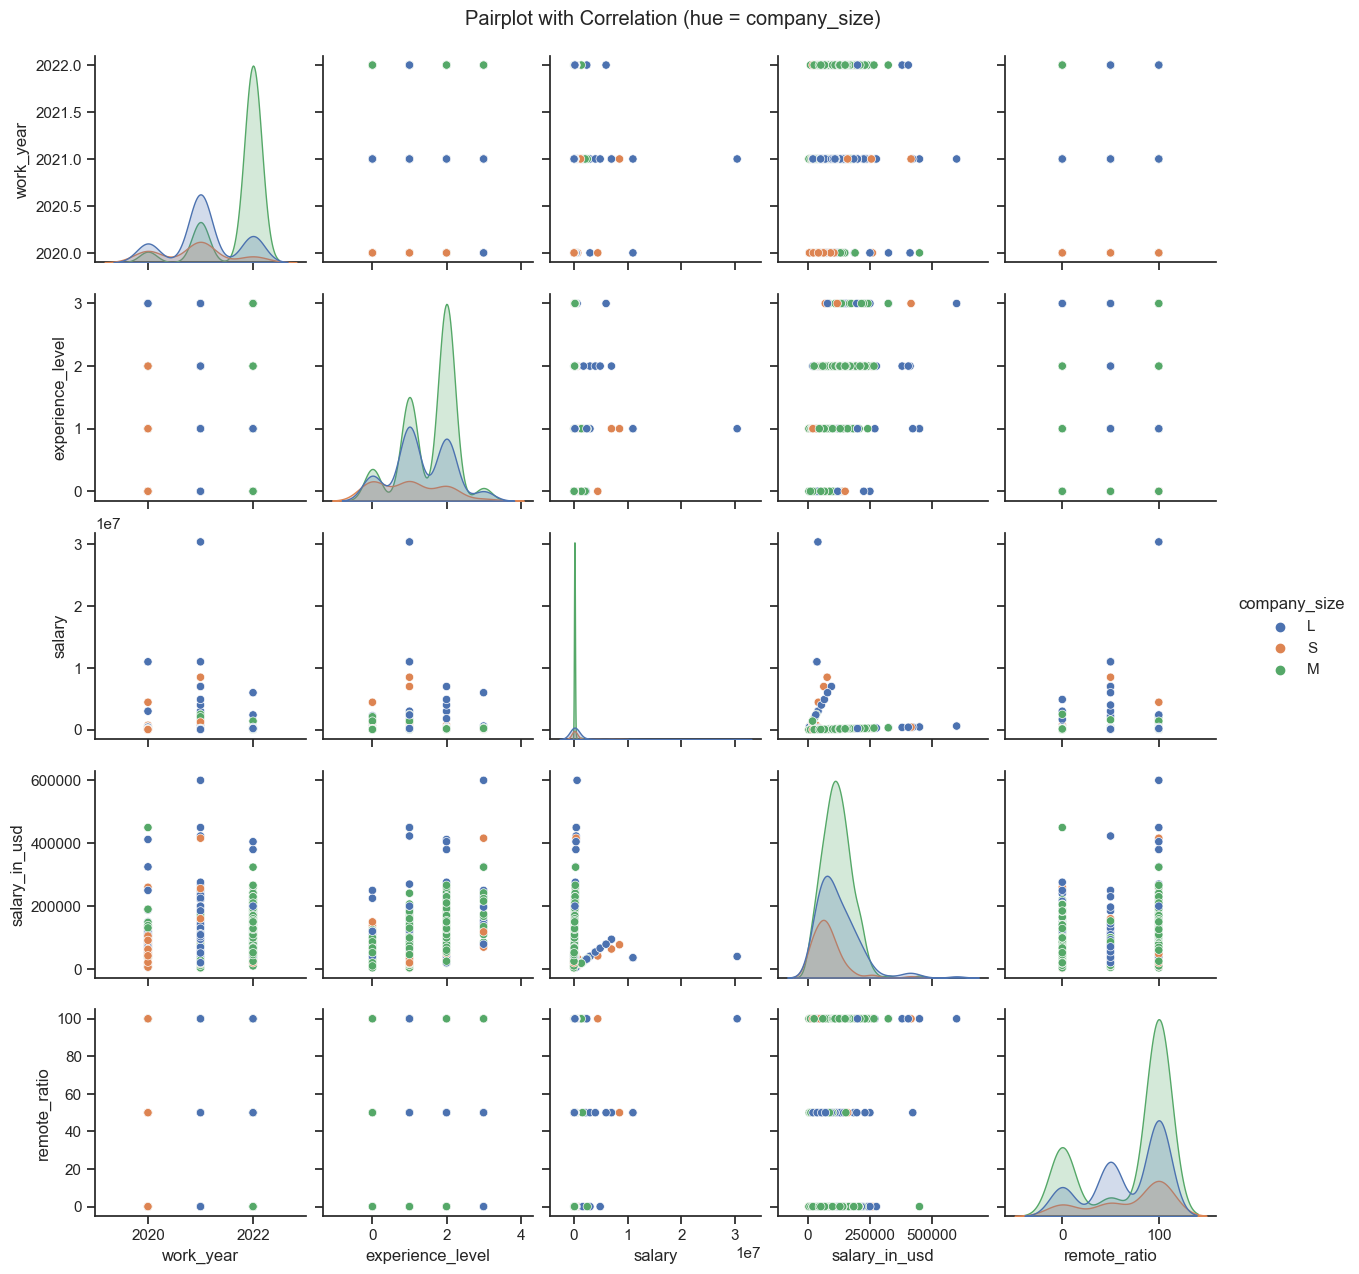

In [122]:
sns.set(style="ticks")

pairplot = sns.pairplot(ds_salaries_data, hue="company_size", kind="scatter")
pairplot.fig.suptitle("Pairplot with Correlation (hue = company_size)", y=1.02)

plt.show()


It can be noticed that there are no important relations.

## 4.2. Visualising the heat map (Bi-variate)

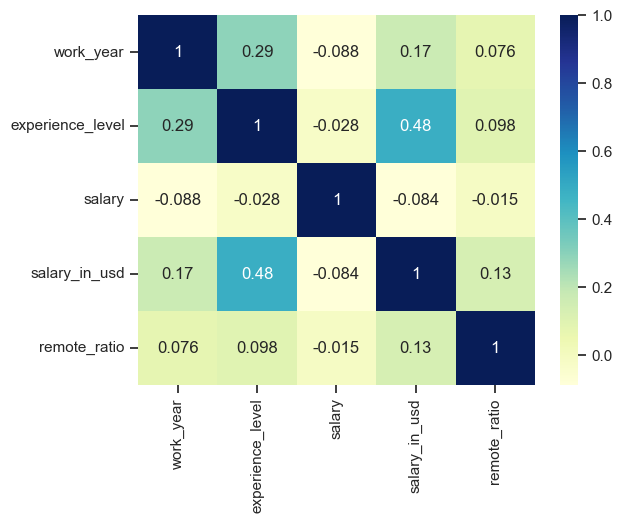

In [123]:
sns.heatmap(ds_salaries_data.corr(), cmap = "YlGnBu", annot = True)

plt.show()

It is not a big surprise that the correlation is high somehow between the experince level and the salary in usd

## 4.4. Visualising some statisctics using barplots (Bi-variate)

In [124]:
ds_salaries_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [125]:
ds_salaries_data["company_location"].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

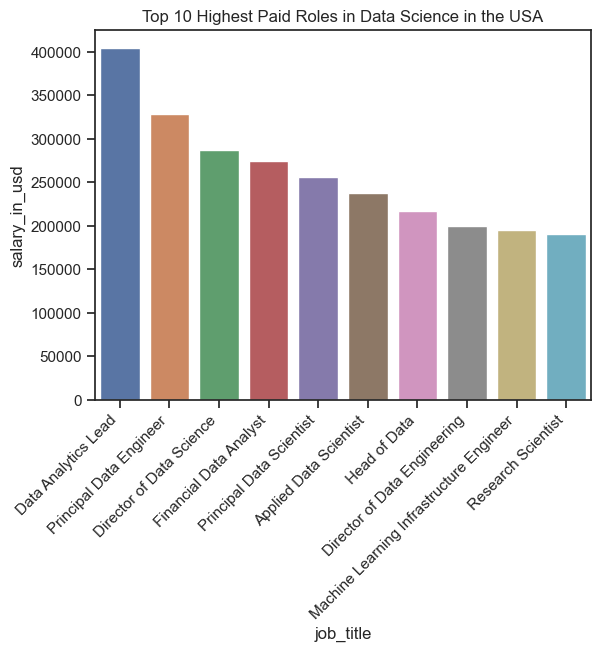

In [126]:
# Filter data for USA
ds_salaries_data_usa = ds_salaries_data[ds_salaries_data['company_location'] == 'US']

# Group by 'job_title' and calculate the average salary for each job title in the USA
average_salaries_usa = ds_salaries_data_usa.groupby('job_title', as_index=False)['salary_in_usd'].mean()

# Sort the values by average 'salary_in_usd' in descending order and select the top 10
top_10_average_salaries = average_salaries_usa.sort_values(by='salary_in_usd', ascending=False).head(10)

# Create the bar plot
sns.barplot(data=top_10_average_salaries, x='job_title', y='salary_in_usd')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Highest Paid Roles in Data Science in the USA")

# Show the plot
plt.show()


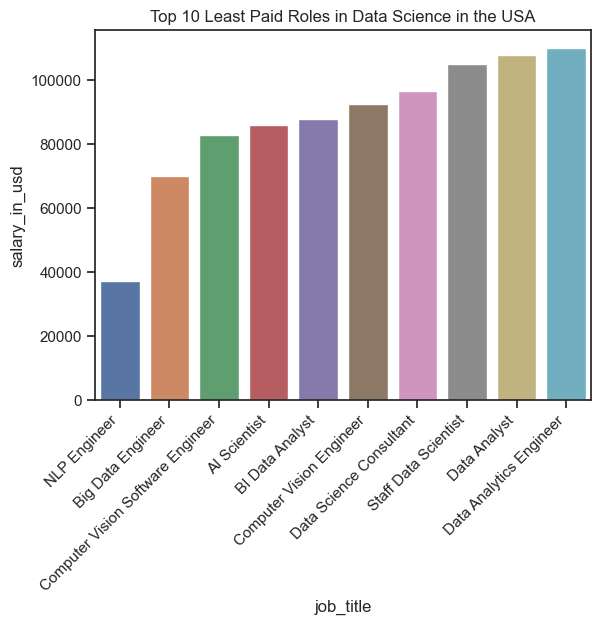

In [127]:
# Filter data for USA
ds_salaries_data_usa = ds_salaries_data[ds_salaries_data['company_location'] == 'US']

# Group by 'job_title' and calculate the average salary for each job title in the USA
average_salaries_usa = ds_salaries_data_usa.groupby('job_title', as_index=False)['salary_in_usd'].mean()

# Sort the values by average 'salary_in_usd' in ascending order and select the top 10
bottom_10_average_salaries = average_salaries_usa.sort_values(by='salary_in_usd', ascending=True).head(10)

# Create the bar plot
sns.barplot(data=bottom_10_average_salaries, x='job_title', y='salary_in_usd')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Least Paid Roles in Data Science in the USA")

# Show the plot
plt.show()


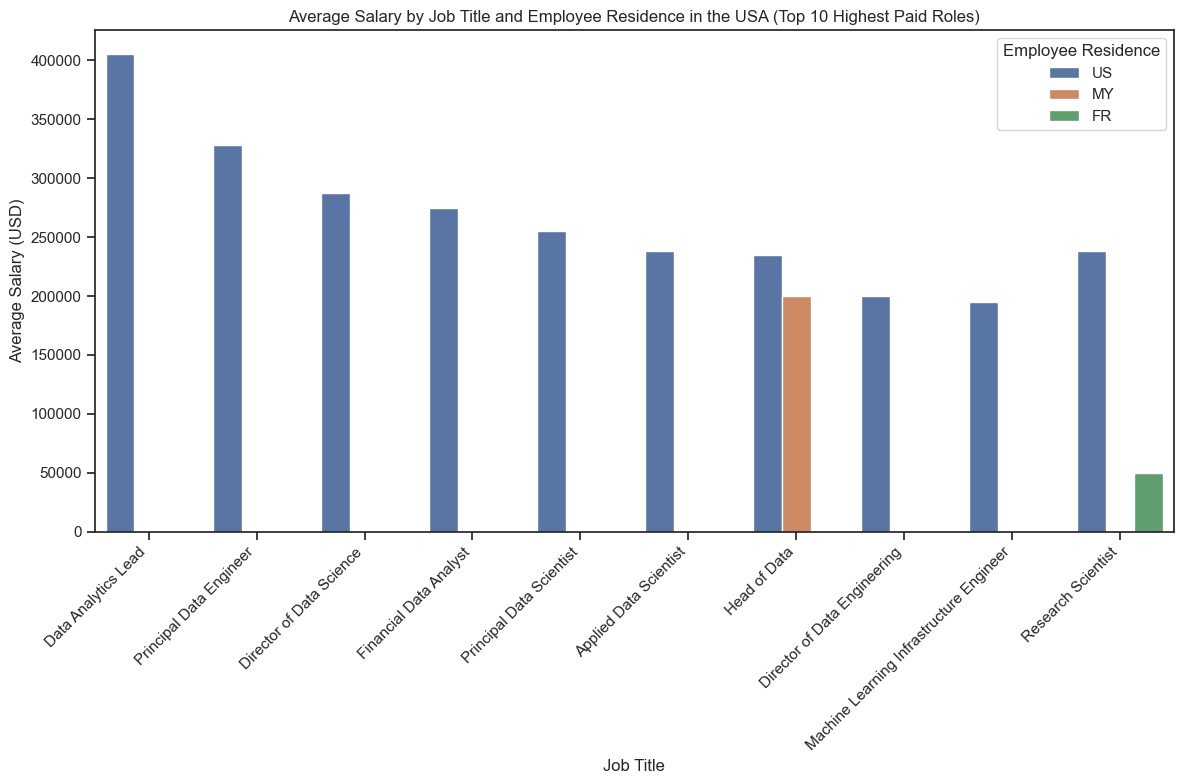

In [128]:
# Filter data for USA
ds_salaries_data_usa = ds_salaries_data[ds_salaries_data['company_location'] == 'US']

# Group by 'job_title' and calculate the average salary for each job title in the USA
average_salaries_usa = ds_salaries_data_usa.groupby(['job_title', 'employee_residence'], as_index=False)['salary_in_usd'].mean()

# Merge with top 10 highest paid roles, specifying suffixes to avoid column conflicts
average_salaries_usa_top_10 = pd.merge(top_10_average_salaries, average_salaries_usa, on='job_title', how='inner', suffixes=('_top_10', '_average'))

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=average_salaries_usa_top_10, x='job_title', y='salary_in_usd_average', hue='employee_residence')
plt.title("Average Salary by Job Title and Employee Residence in the USA (Top 10 Highest Paid Roles)")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employee Residence')
plt.tight_layout()
plt.show()


In [129]:
ds_salaries_data.shape

(607, 11)

In [138]:
ds_salaries_data["employee_residence"].value_counts().head(12)

United States    332
GB                44
India             30
Canada            29
DE                25
FR                18
Spain             15
Greece            13
JP                 7
PT                 6
Brazil             6
PK                 6
Name: employee_residence, dtype: int64

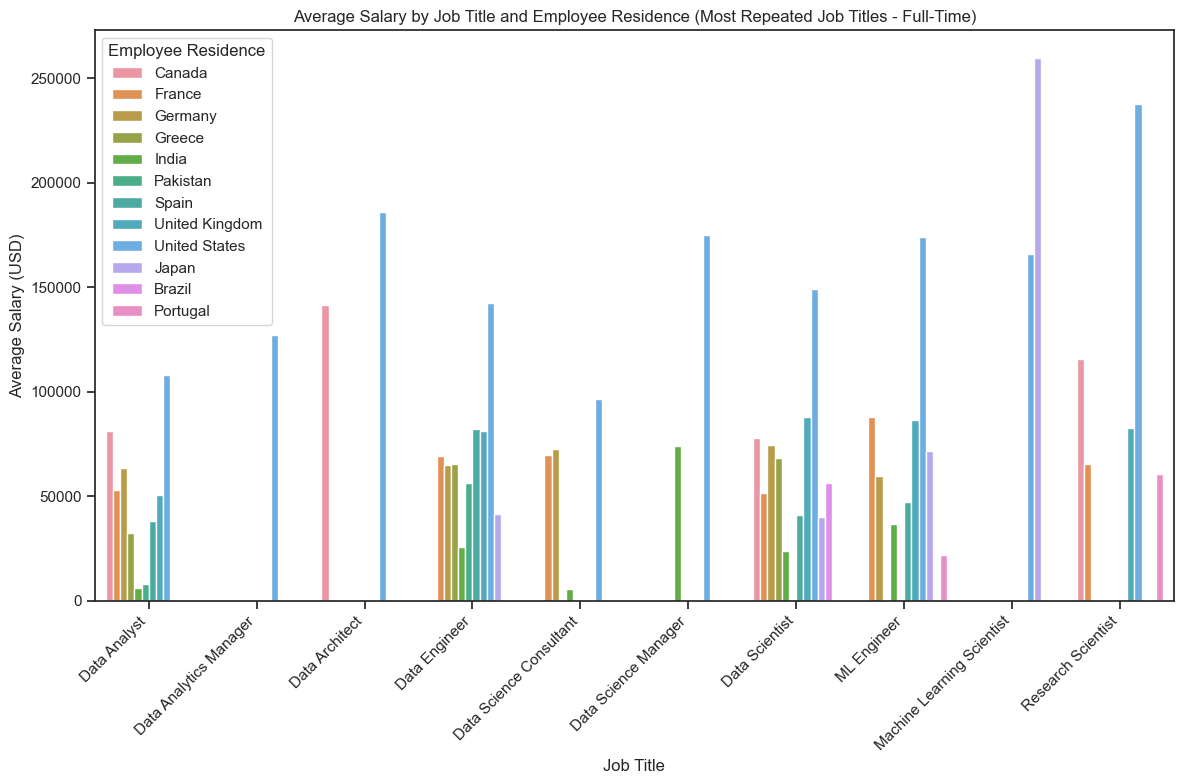

In [144]:
# Replace country codes with country names
ds_salaries_data['employee_residence'] = ds_salaries_data['employee_residence'].replace(country_code_to_name)

# Filter data for full-time roles and countries in the country_code_to_name dictionary
ds_salaries_data_full_time_filtered = ds_salaries_data[(ds_salaries_data['employment_type'] == 'FT') & 
                                                      (ds_salaries_data['employee_residence'].isin(country_code_to_name.values()))]

# Find the most repeated job titles
most_repeated_job_titles = ds_salaries_data_full_time_filtered['job_title'].value_counts().head(10).index.tolist()

# Filter data for the most repeated job titles
average_salaries_most_repeated = ds_salaries_data_full_time_filtered[ds_salaries_data_full_time_filtered['job_title'].isin(most_repeated_job_titles)]

# Group by 'job_title' and 'employee_residence' and calculate the average salary for each job title
average_salaries_most_repeated = average_salaries_most_repeated.groupby(['job_title', 'employee_residence'], as_index=False)['salary_in_usd'].mean()

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=average_salaries_most_repeated, x='job_title', y='salary_in_usd', hue='employee_residence')
plt.title("Average Salary by Job Title and Employee Residence (Most Repeated Job Titles - Full-Time)")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employee Residence')
plt.tight_layout()
plt.show()


It is interesting how the average salary is highly varied between differnet countries

## 4.5. Visualising some statisctics using violin plot (Bi-variate)

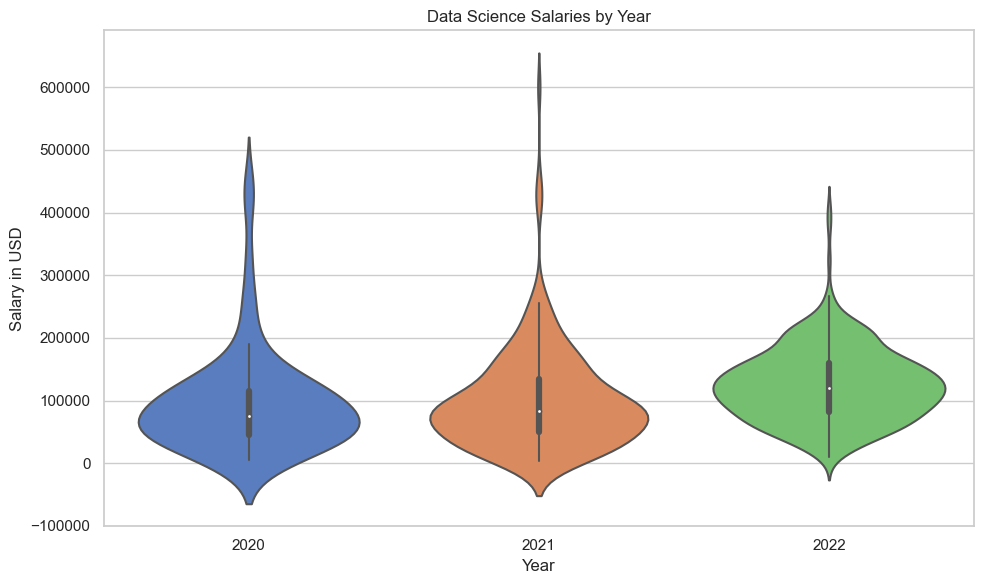

In [34]:
# Set Seaborn style to mimic Plotly's "seaborn" template
sns.set_theme(style="whitegrid")

# Create the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=ds_salaries_data, x='work_year', y='salary_in_usd', palette='muted', split=True)
plt.title("Data Science Salaries by Year")
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()


We can see that the median is increasing by the year